In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
import seaborn as sns

In [37]:
data = pd.read_csv('/content/Retail.csv')

In [38]:
data.head(10)

,OrderNumber,ProductName,Color,Category,Subcategory,ListPrice,Orderdate,Duedate,Shipdate,PromotionName,SalesRegion,OrderQuantity,UnitPrice,SalesAmount,DiscountAmount,TaxAmount,Freight
0,SO43843,"Mountain-100 Silver, 48",Silver,Bikes,Mountain Bikes,3399.9900,1/29/2011,02-10-2011,02-05-2011,No Discount,Central,2,2039.9940,4079.9880,0.0,326.3990,101.9997
1,SO43843,"Mountain-100 Black, 48",Black,Bikes,Mountain Bikes,3374.9900,1/29/2011,02-10-2011,02-05-2011,No Discount,Central,2,2024.9940,4049.9880,0.0,323.9990,101.2497
2,SO43843,"HL Mountain Frame - Silver, 46",Silver,Components,Mountain Frames,1204.3248,1/29/2011,02-10-2011,02-05-2011,No Discount,Central,2,722.5949,1445.1898,0.0,115.6152,36.1297
3,SO43843,"Mountain-100 Black, 44",Black,Bikes,Mountain Bikes,NaN,1/29/2011,02-10-2011,02-05-2011,No Discount,Central,5,2024.9940,10124.9700,0.0,809.9976,253.1243
4,SO43843,"HL Mountain Frame - Silver, 38",Silver,Components,Mountain Frames,1204.3248,1/29/2011,02-10-2011,02-05-2011,No Discount,Central,2,722.5949,1445.1898,0.0,115.6152,36.1297
5,SO43843,"HL Mountain Frame - Silver, 48",Silver,Components,Mountain Frames,1364.5000,1/29/2011,02-10-2011,02-05-2011,No Discount,Central,1,818.7000,818.7000,0.0,65.4960,20.4675
6,SO43843,"HL Mountain Frame - Black, 48",Black,Components,Mountain Frames,1349.6000,1/29/2011,02-10-2011,02-05-2011,No Discount,Central,Nan,809.7600,809.7600,0.0,64.7808,20.2440
7,SO43843,"Mountain-100 Silver, 38",Silver,Bikes,Mountain Bikes,3399.9900,1/29/2011,02-10-2011,02-05-2011,No Discount,Central,2,2039.9940,4079.9880,0.0,326.3990,101.9997
8,SO43843,"Mountain Bike Socks, M",White,Clothing,Socks,9.5000,1/29/2011,02-10-2011,02-05-2011,No Discount,Central,2,5.7000,11.4000,0.0,0.9120,0.2850
9,SO43843,"Mountain-100 Black, 42",Black,Bikes,Mountain Bikes,3374.9900,1/29/2011,02-10-2011,02-05-2011,No Discount,Central,3,2024.9940,6074.9820,0.0,485.9986,151.8746


In [39]:
data.shape


(32040, 17)

In [10]:
data.dtypes

,0
OrderNumber,object
ProductName,object
Color,object
Category,object
Subcategory,object
ListPrice,float64
Orderdate,object
Duedate,object
Shipdate,object
PromotionName,object


In [15]:
data.nunique()

,0
OrderNumber,1871
ProductName,250
Color,8
Category,4
Subcategory,33
ListPrice,103
Orderdate,17
Duedate,17
Shipdate,17
PromotionName,7


In [16]:
data['OrderQuantity'].fillna(1, inplace=True)

<ipython-input-16-bfbedb948d97>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['OrderQuantity'].fillna(1, inplace=True)


In [17]:
data.ListPrice = data.groupby('ProductName')['ListPrice'].apply(lambda x: x.fillna(x.mean()))
data.ListPrice = data.ListPrice.fillna(data.ListPrice.mean())

<ipython-input-17-35e0d9d45ecf>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.ListPrice = data.groupby('ProductName')['ListPrice'].apply(lambda x: x.fillna(x.mean()))


In [18]:
# outliers = data[data['SalesAmount'] > (data['SalesAmount'].mean() + (3 * data['SalesAmount'].std()))]
# outliers2 = data[data['SalesAmount'] < (data['SalesAmount'].mean() - (3 * data['SalesAmount'].std()))]
# outliers.append(outliers2)
# outliers.head()

#removing outliers from data:
print(data['SalesAmount'].mean(), data['SalesAmount'].std(), data['SalesAmount'].mean() - 3 * data['SalesAmount'].std(), data['SalesAmount'].mean() + 3 * data['SalesAmount'].std())
data = data[data['SalesAmount'] < (data['SalesAmount'].mean() + (3 * data['SalesAmount'].std()))]
data = data[data['SalesAmount'] > (data['SalesAmount'].mean() - (3 * data['SalesAmount'].std()))]


1299.0231307709114 2153.3166252655237 -5160.926745025659 7758.973006567483


In [20]:
data['OrderQuantity'] = pd.to_numeric(data['OrderQuantity'], errors='coerce')
data.groupby(['Category']).agg({'OrderQuantity':np.sum}).reset_index()

<ipython-input-20-3e9dcacf408f>:2: FutureWarning: The provided callable <function sum at 0x7ea1cfa20f40> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data.groupby(['Category']).agg({'OrderQuantity':np.sum}).reset_index()


,Category,OrderQuantity
0,Accessories,14355.0
1,Bikes,31999.0
2,Clothing,35565.0
3,Components,28148.0


In [34]:
#Kmeans
from sklearn.preprocessing import KBinsDiscretizer
enc = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
X= data.iloc[:,12:13]
X_binned = enc.fit_transform(X)

print('Original Data:\n',X.head(20))
print('Bin edges:\n',enc.bin_edges_)
print('Descritized Data:\n', X_binned[0:20,:])

Original Data:
     UnitPrice
0   2039.9940
1   2024.9940
2    722.5949
4    722.5949
5    818.7000
6    809.7600
7   2039.9940
8      5.7000
9   2024.9940
11  2024.9940
12  2024.9940
13  2024.9940
14   183.9382
15    28.8404
16   419.4589
17   419.4589
18   419.4589
19   874.7940
20   419.4589
21  2146.9620
Bin edges:
 [array([1.32820000e+00, 2.47825613e+02, 6.09702667e+02, 1.07741299e+03,
        1.71500429e+03, 2.14696200e+03])                               ]
Descritized Data:
 [[4.]
 [4.]
 [2.]
 [2.]
 [2.]
 [2.]
 [4.]
 [0.]
 [4.]
 [4.]
 [4.]
 [4.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [4.]]


<Axes: xlabel='Category', ylabel='ListPrice'>

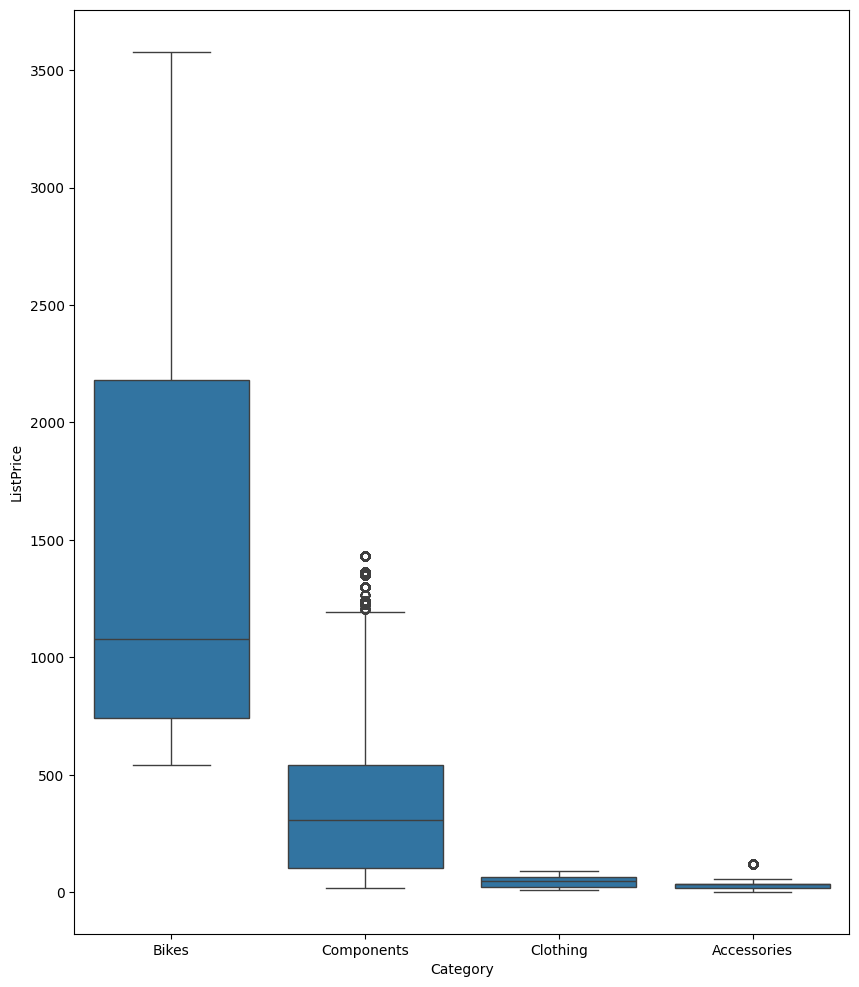

In [21]:
plt.figure(figsize =(10, 12))
sns.boxplot(y= data['ListPrice'], x = data['Category'])

<ipython-input-22-031749e13ea5>:1: FutureWarning: The provided callable <function sum at 0x7ea1cfa20f40> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df = data.groupby(['Category']).agg({'OrderQuantity':np.sum}).reset_index()


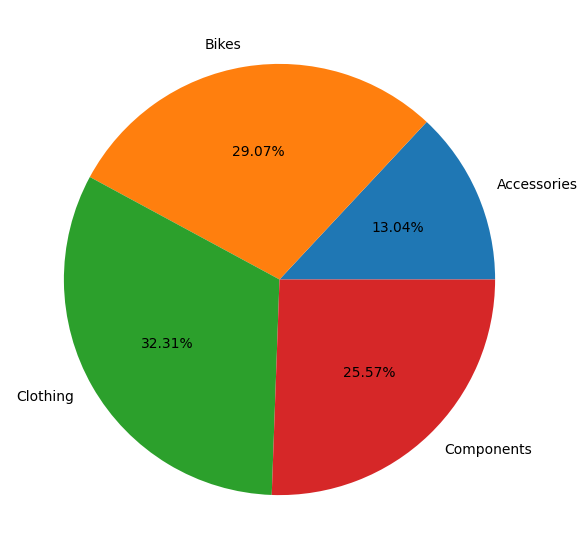

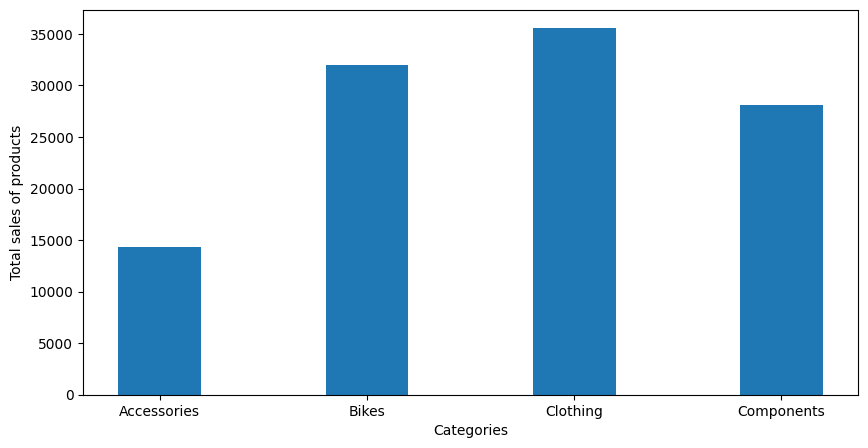

In [22]:
df = data.groupby(['Category']).agg({'OrderQuantity':np.sum}).reset_index()
fig1 = plt.figure(figsize =(10, 7))
plt.pie(df.OrderQuantity, labels = df.Category,autopct='%1.2f%%')
# show plot
plt.show()

fig2 = plt.figure(figsize = (10, 5))
plt.bar(df.Category, df.OrderQuantity, width = 0.4)
plt.xlabel("Categories")
plt.ylabel("Total sales of products")
# show plot
plt.show()

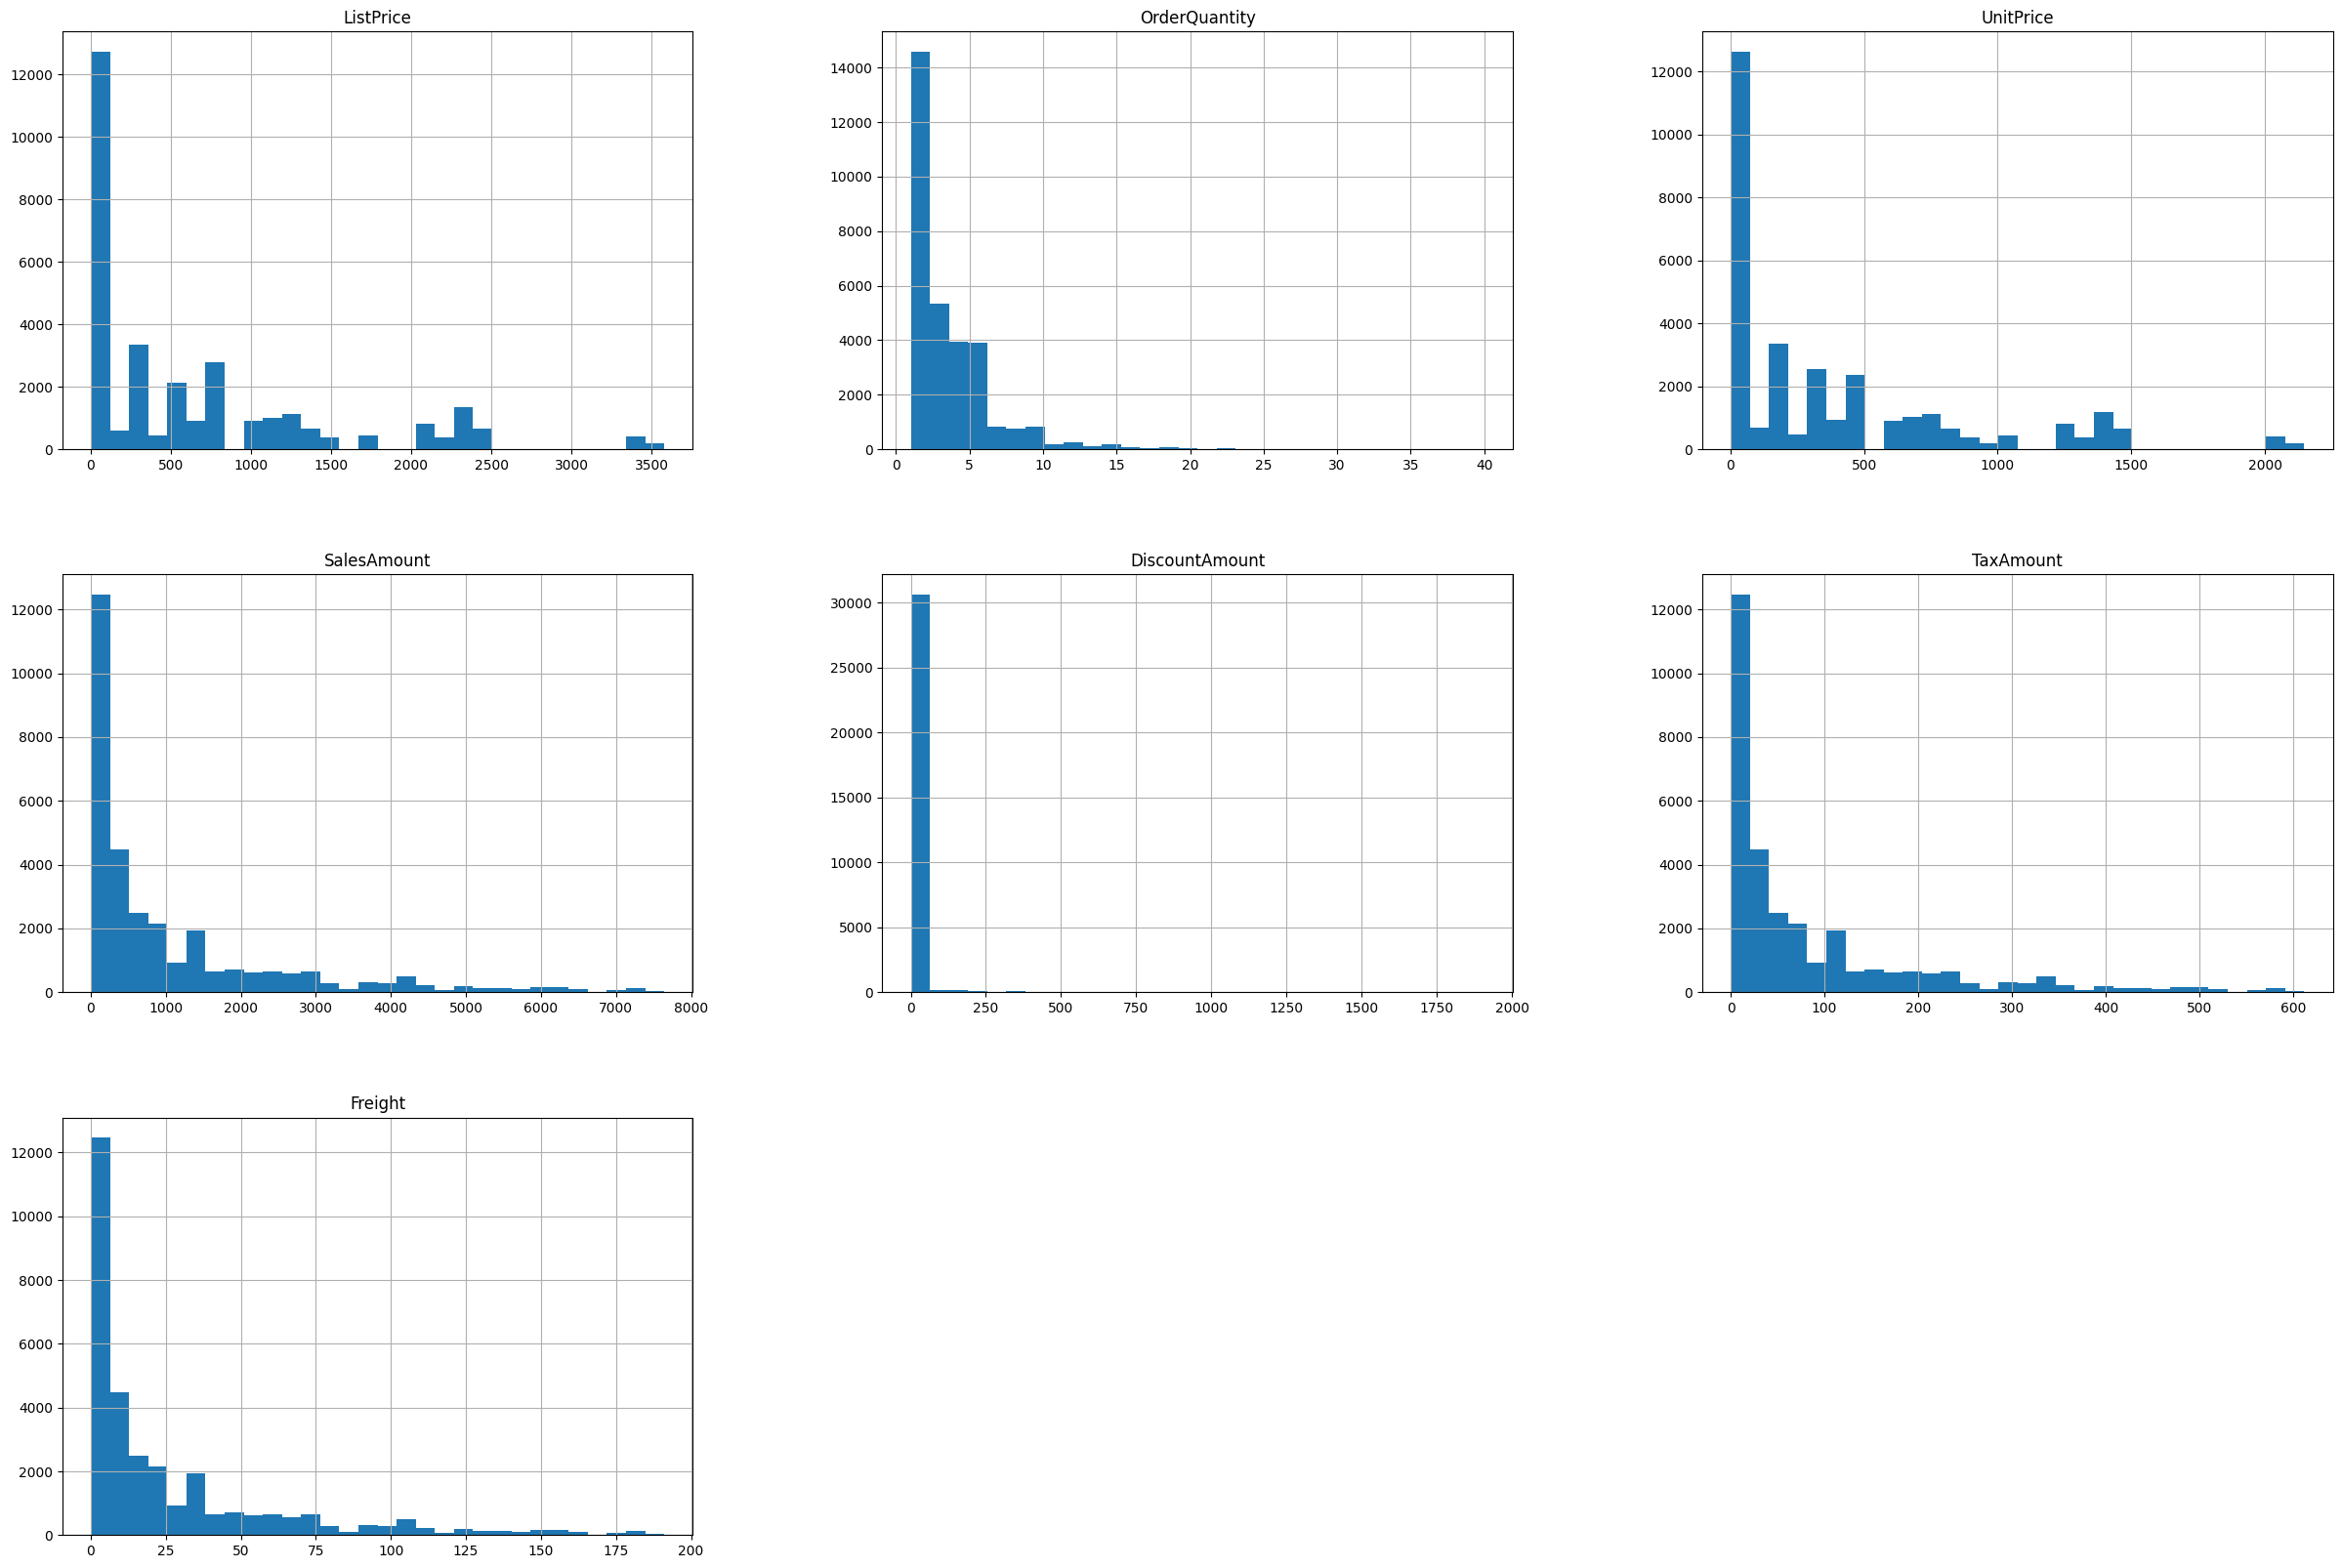

In [23]:
# Plot the histograms of each
data.hist(bins=30, figsize=(30,20))
plt.show()

,UnitPrice
0,7.620702
1,7.613322
2,6.582849
4,6.582849
5,6.707718
...,...
32035,7.265739
32036,6.591550
32037,6.400832
32038,6.591550


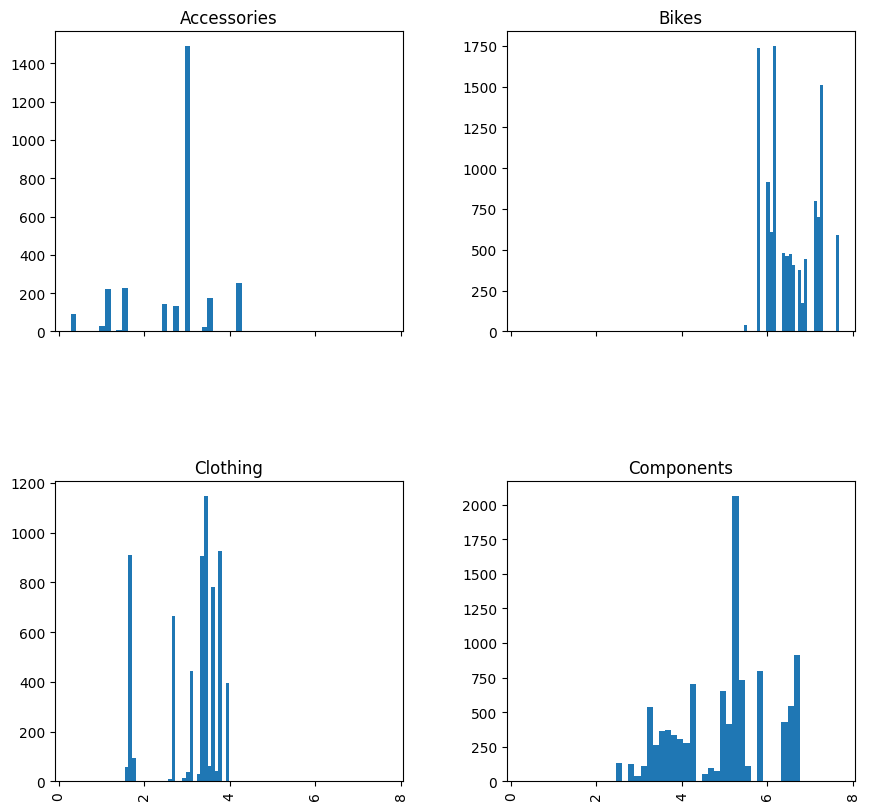

In [24]:
plot_test=np.log(data.UnitPrice).hist(by=data['Category'],sharex=True,figsize=(10,10), bins=30)
np.log(data.UnitPrice)

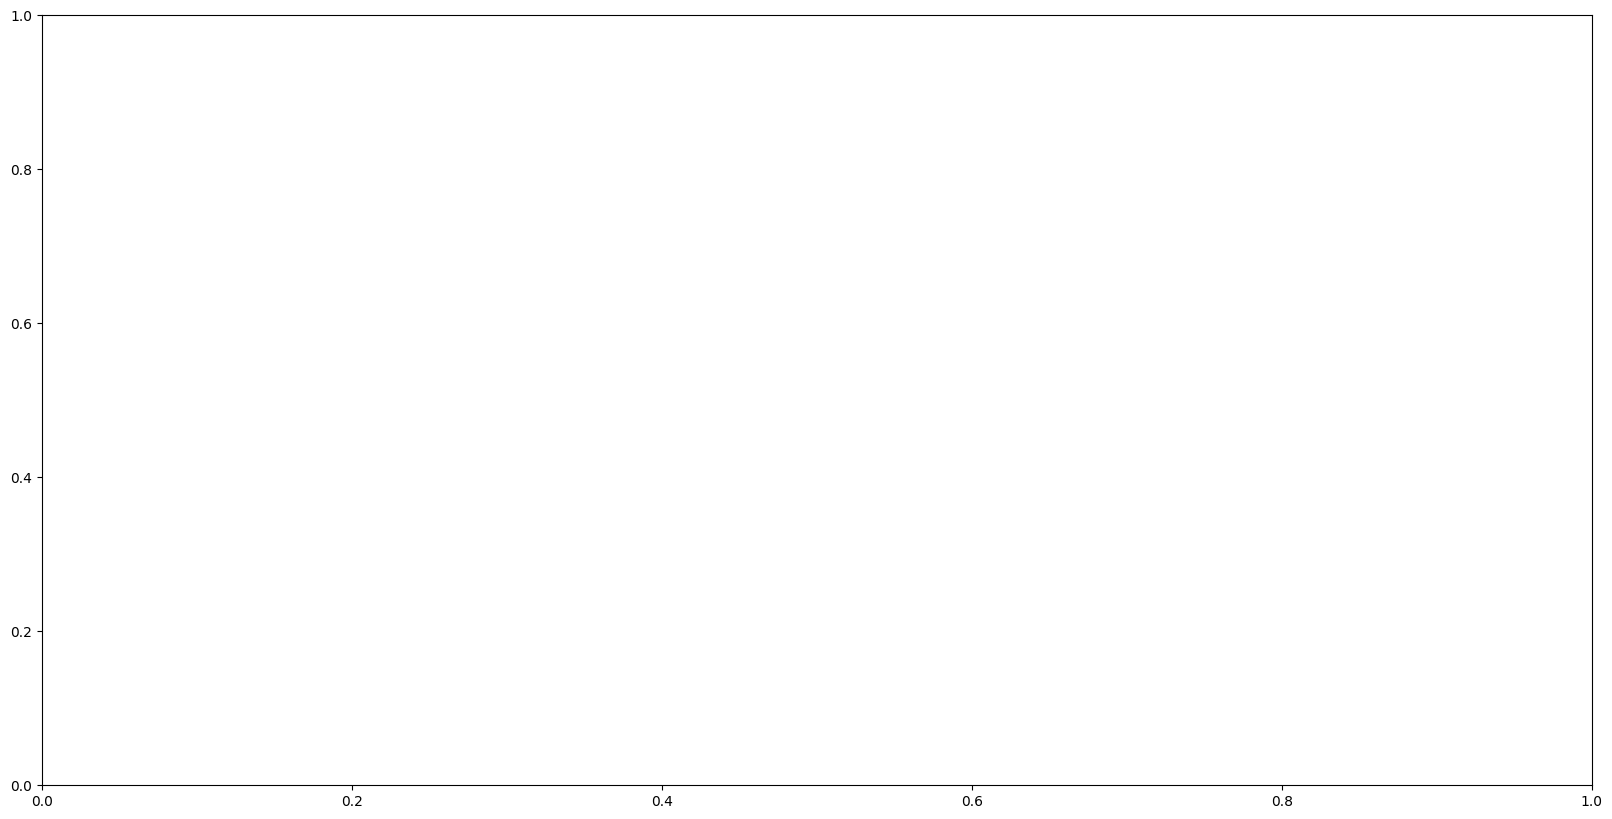

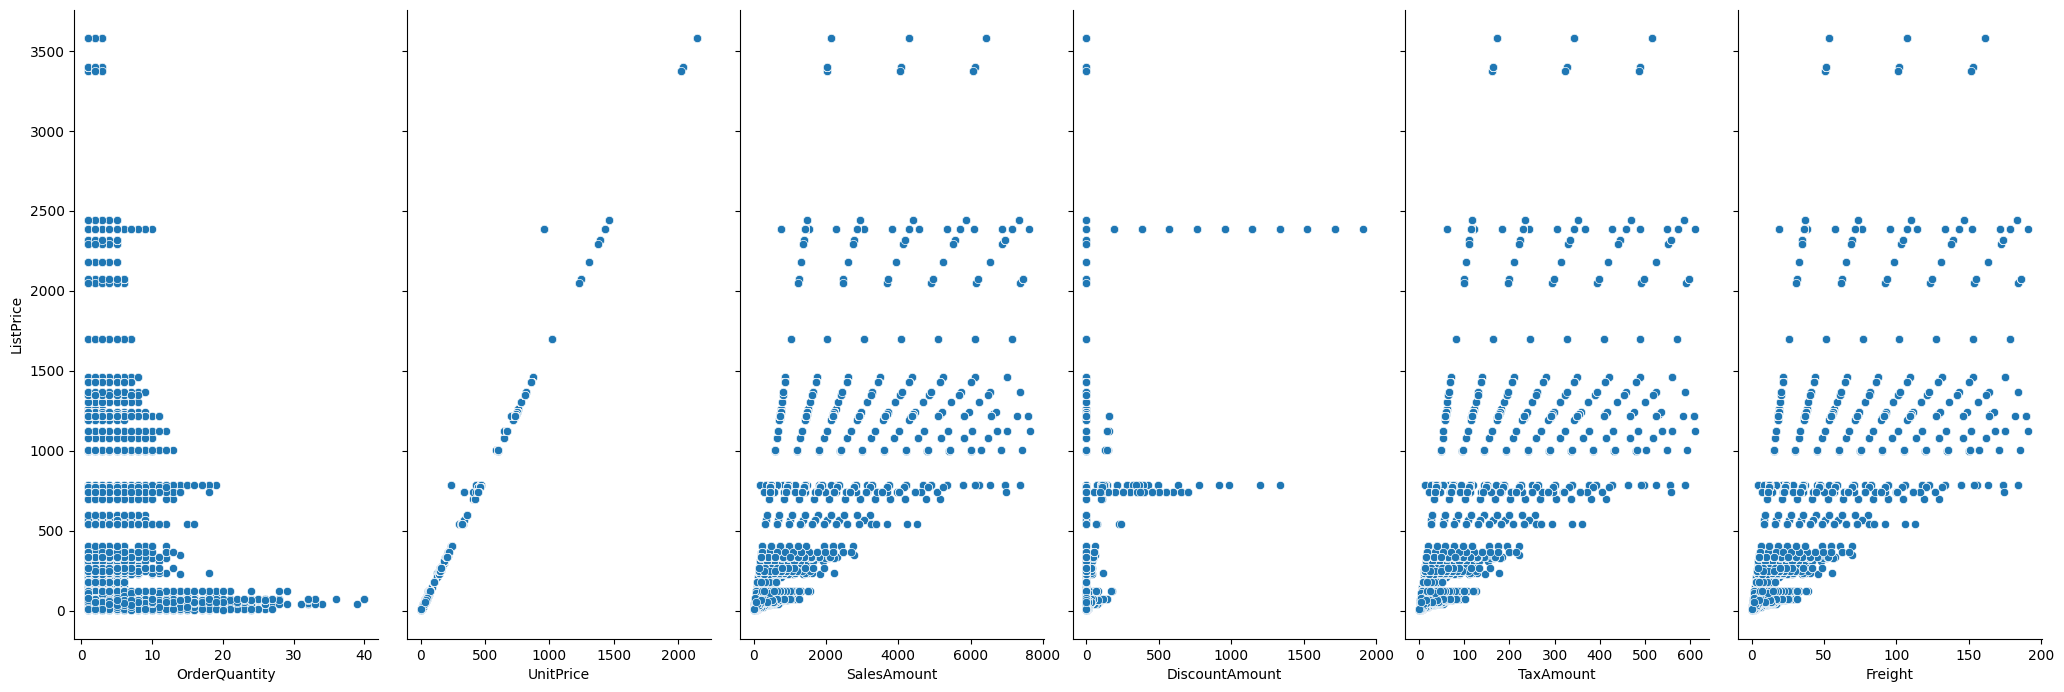

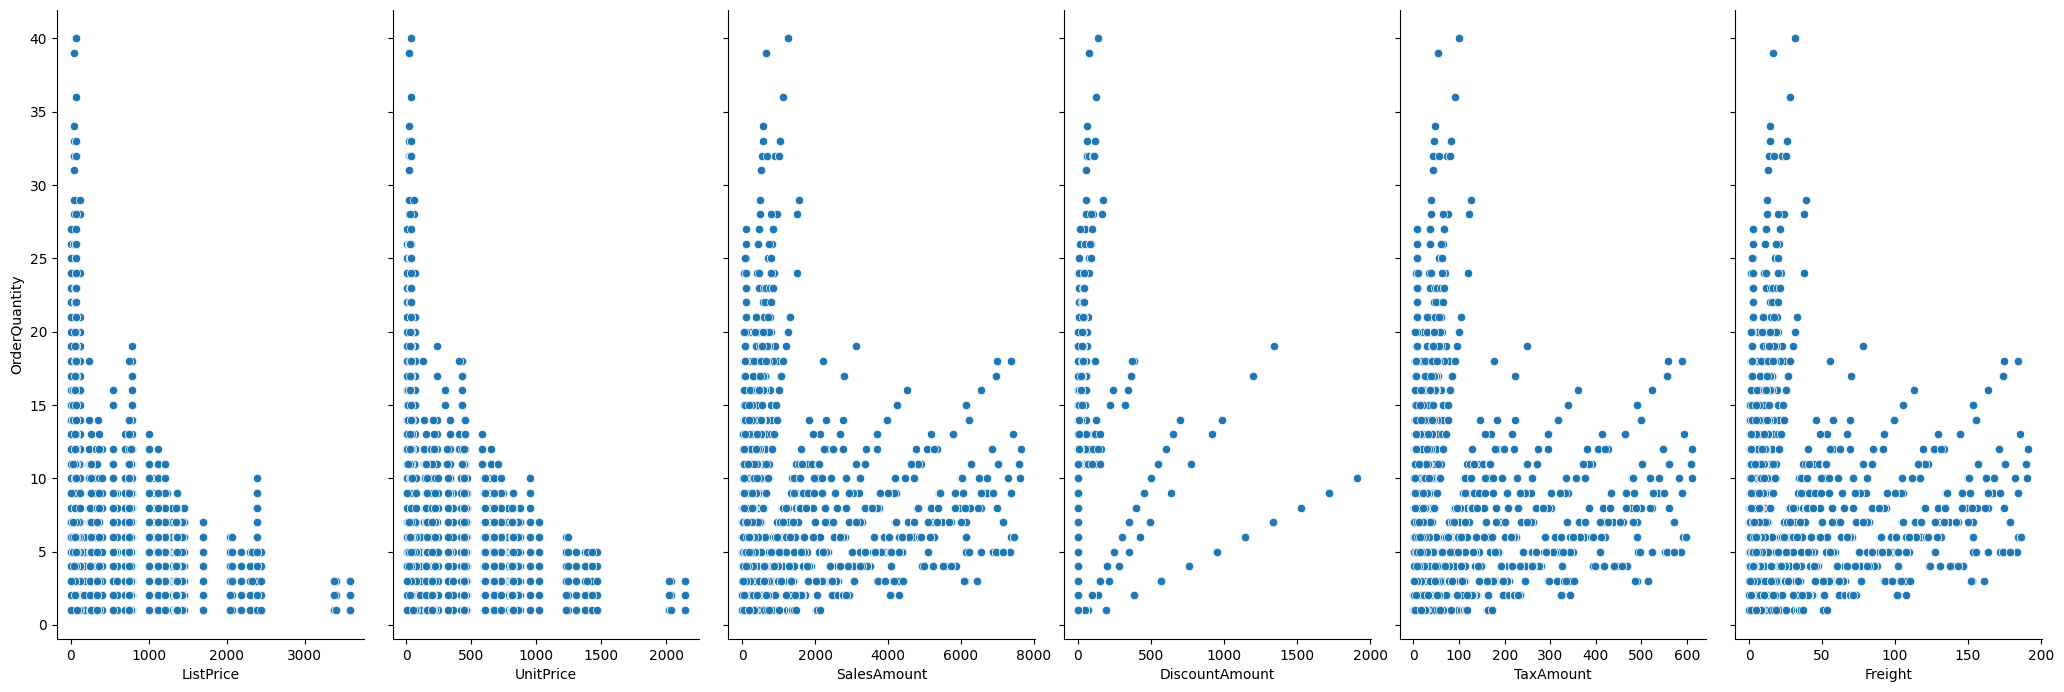

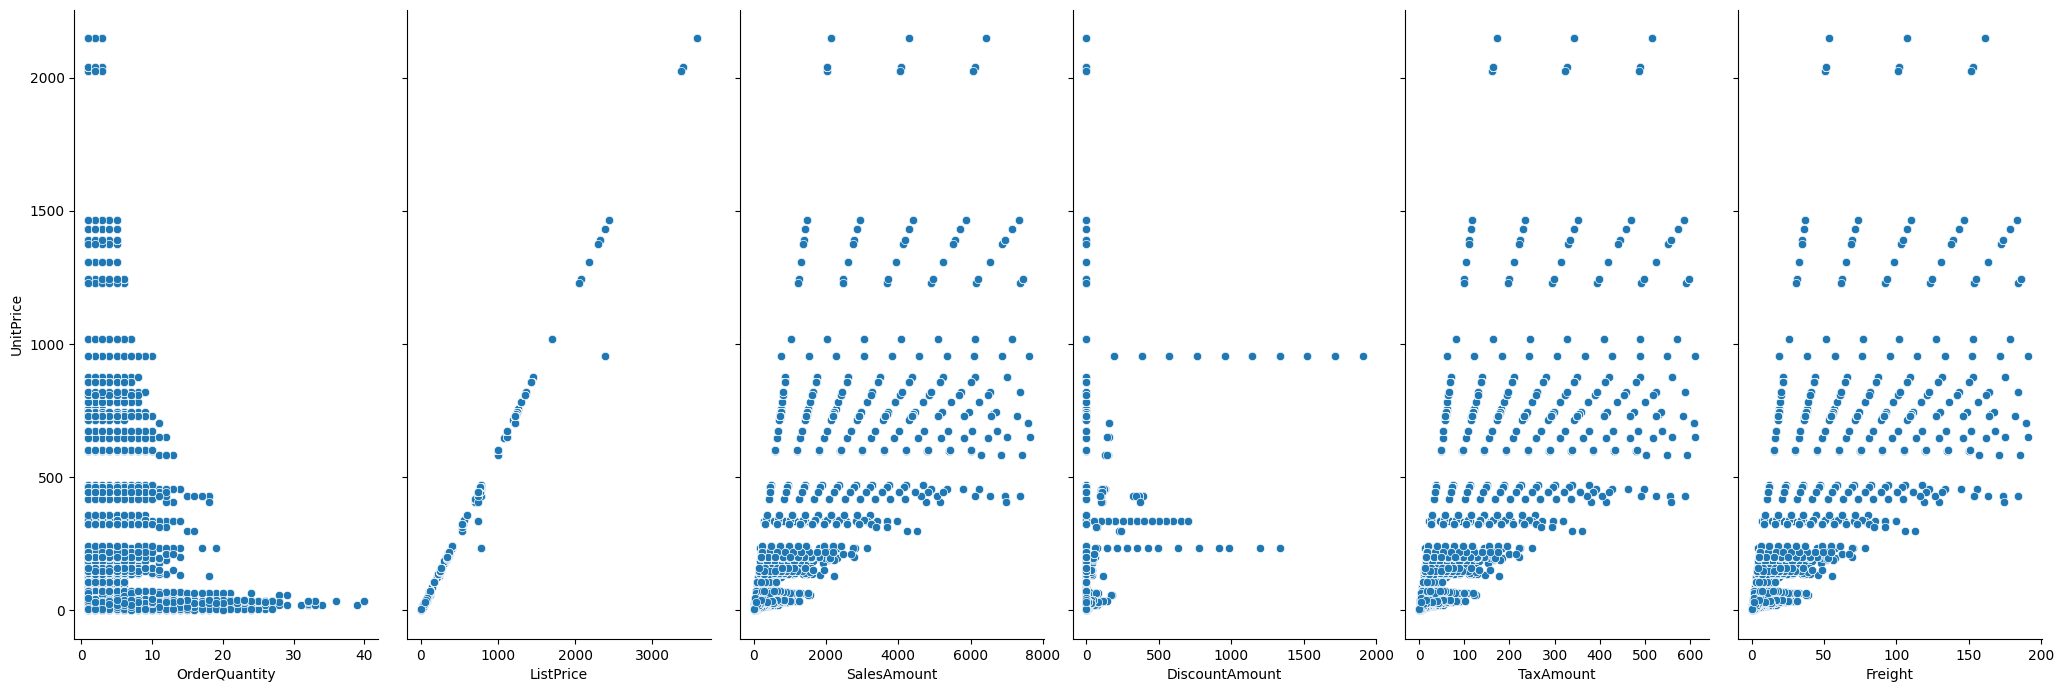

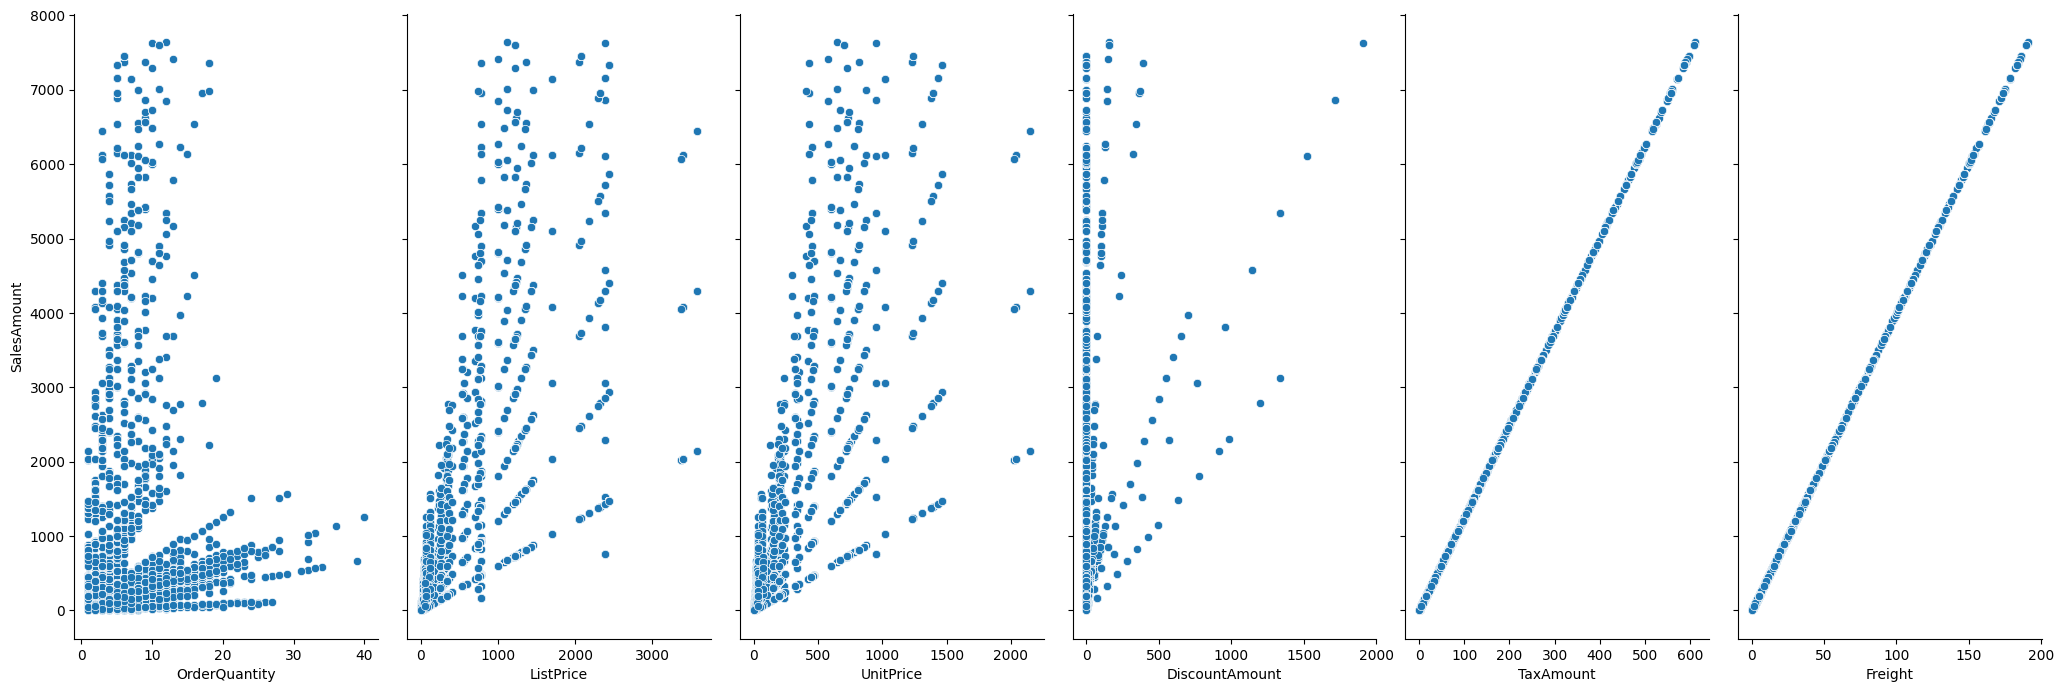

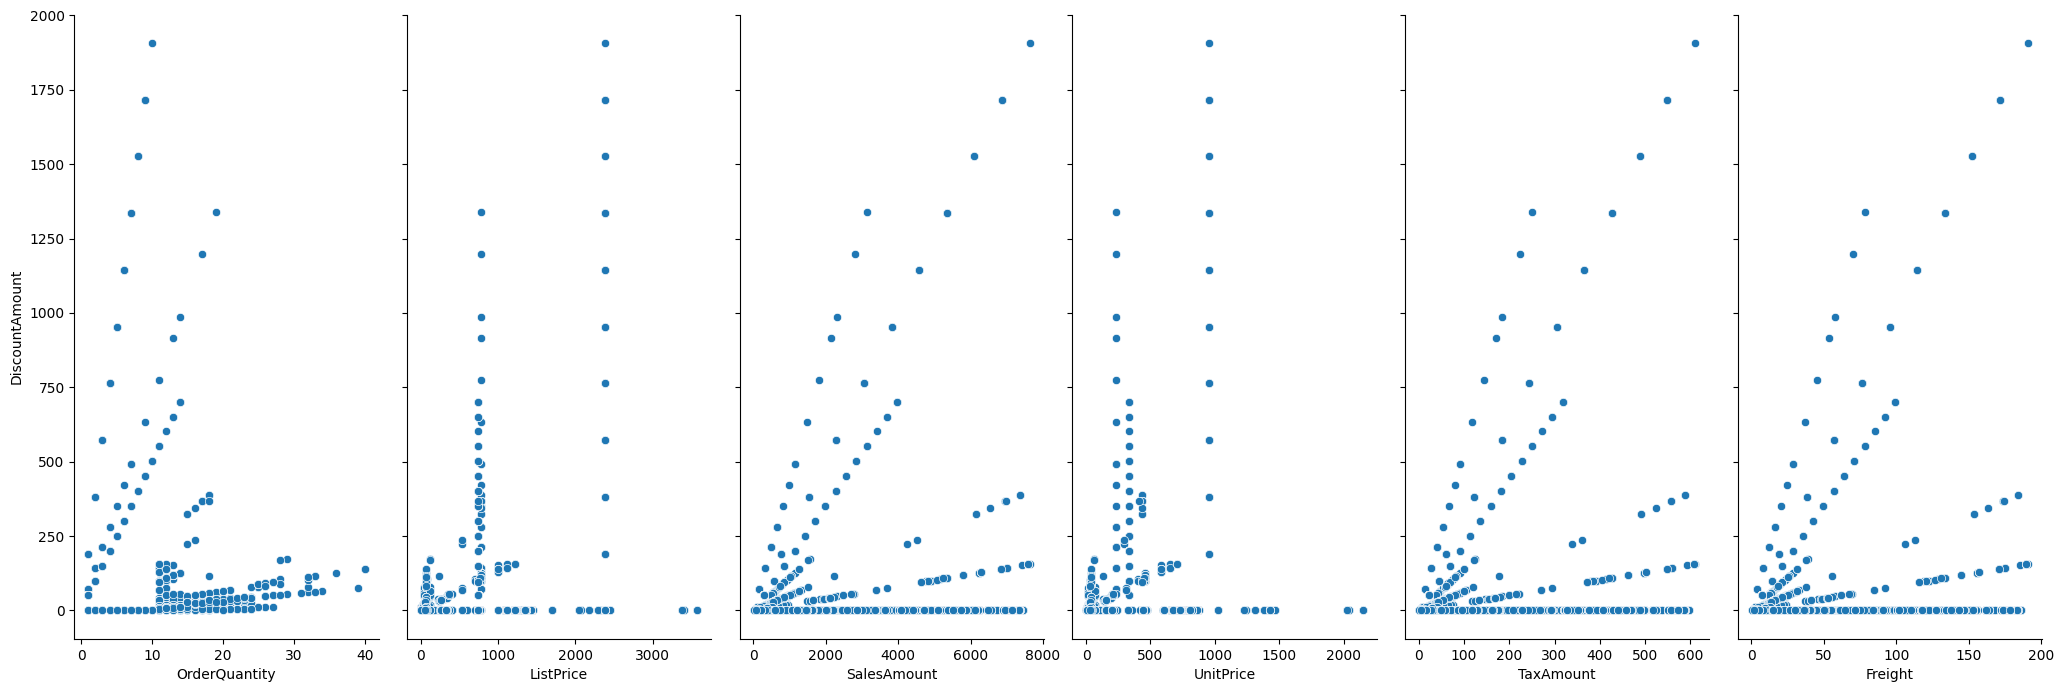

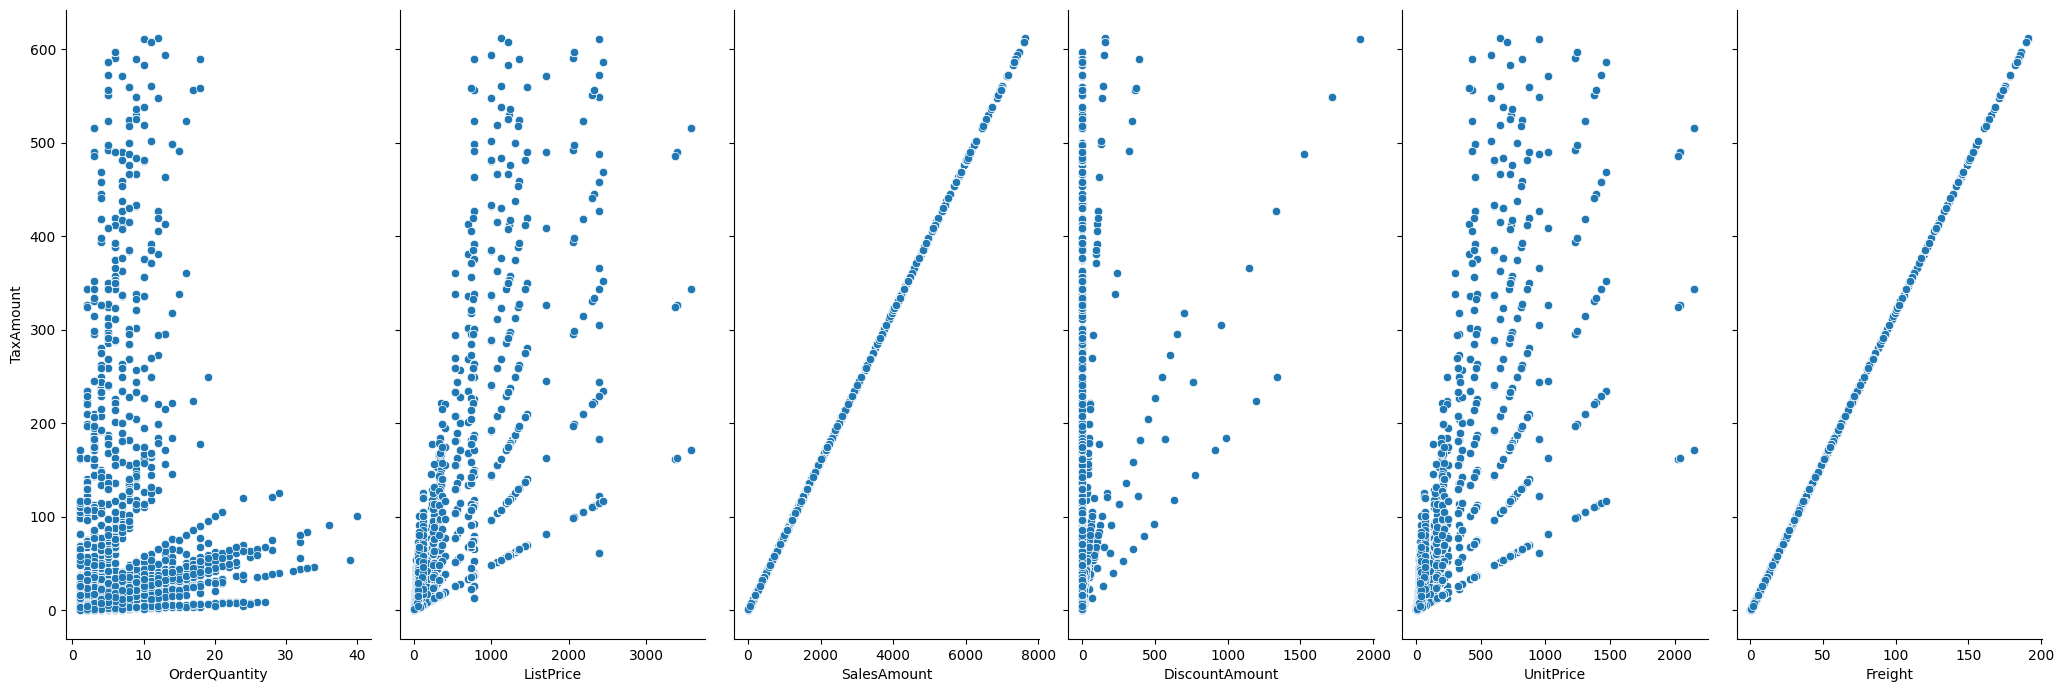

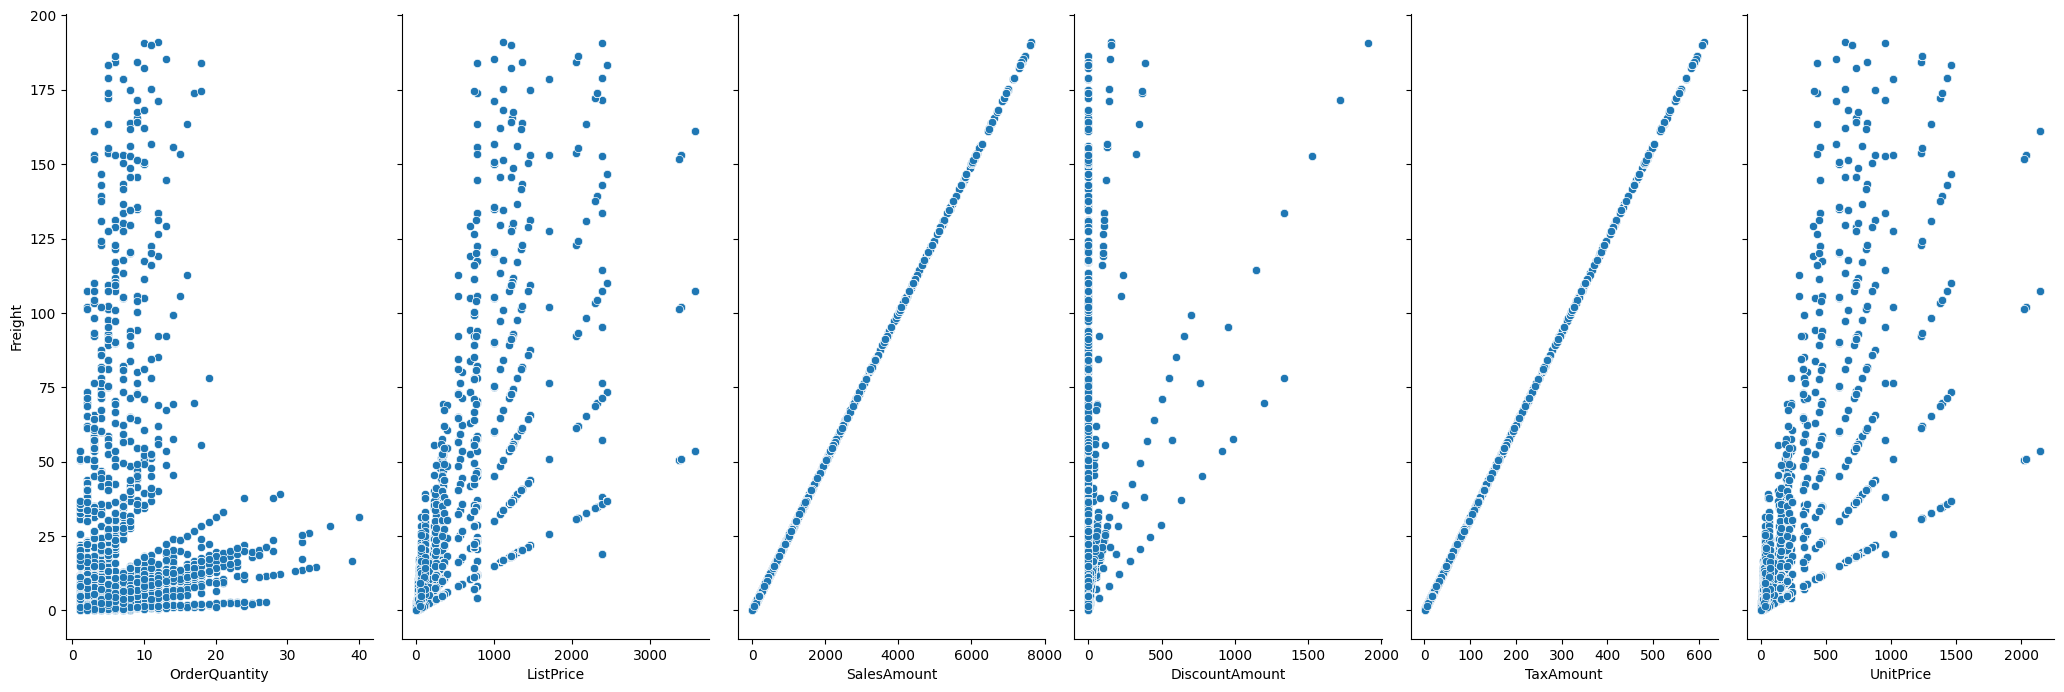

In [27]:
#Scatter plot
fig, ax = plt.subplots(figsize=(20, 10)) # Create a figure and axes object

sns.pairplot(data, x_vars=['OrderQuantity','UnitPrice', 'SalesAmount', 'DiscountAmount', 'TaxAmount', 'Freight'], y_vars='ListPrice', height=7, aspect=0.5)
sns.pairplot(data, x_vars=['ListPrice','UnitPrice', 'SalesAmount', 'DiscountAmount', 'TaxAmount', 'Freight'], y_vars='OrderQuantity', height=7, aspect=0.5)
sns.pairplot(data, x_vars=['OrderQuantity','ListPrice', 'SalesAmount', 'DiscountAmount', 'TaxAmount', 'Freight'], y_vars='UnitPrice', height=7, aspect=0.5)
sns.pairplot(data, x_vars=['OrderQuantity','ListPrice', 'UnitPrice', 'DiscountAmount', 'TaxAmount', 'Freight'], y_vars='SalesAmount', height=7, aspect=0.5)
sns.pairplot(data, x_vars=['OrderQuantity','ListPrice', 'SalesAmount', 'UnitPrice', 'TaxAmount', 'Freight'], y_vars='DiscountAmount', height=7, aspect=0.5)
sns.pairplot(data, x_vars=['OrderQuantity','ListPrice', 'SalesAmount', 'DiscountAmount', 'UnitPrice', 'Freight'], y_vars='TaxAmount', height=7, aspect=0.5)
sns.pairplot(data, x_vars=['OrderQuantity','ListPrice', 'SalesAmount', 'DiscountAmount', 'TaxAmount', 'UnitPrice'], y_vars='Freight', height=7, aspect=0.5)